0      2023-08-04 15:25:27.360
1      2023-08-04 15:25:27.460
2      2023-08-04 15:25:27.730
3      2023-08-04 15:25:27.770
4      2023-08-04 15:25:28.690
                 ...          
2847   2023-08-04 15:33:15.570
2848   2023-08-04 15:33:17.500
2849   2023-08-04 15:33:17.560
2850   2023-08-04 15:33:18.380
2851   2023-08-04 15:33:18.480
Name: Timestamp, Length: 2852, dtype: datetime64[ns]


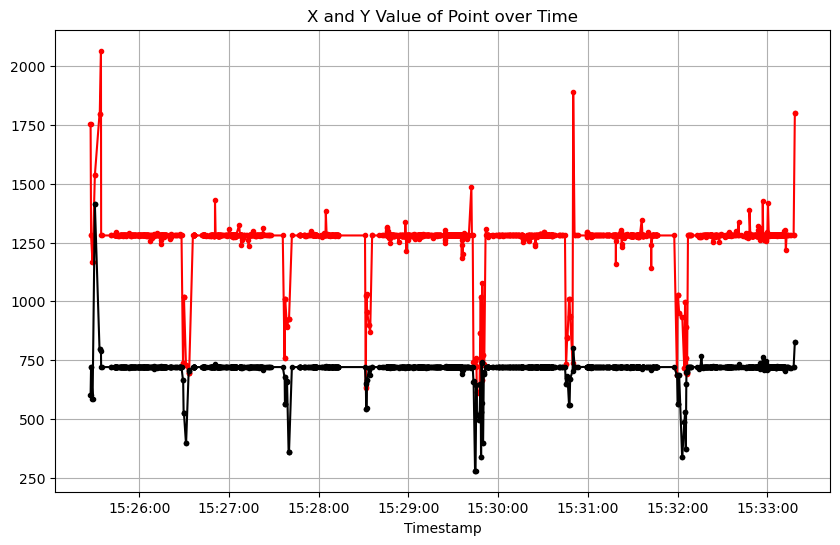

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import pytz
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime, time

# Step 1: Read the CSV file and store it as a DataFrame
df = pd.read_csv('activity_log.csv')

# Step 2: Convert the 'Timestamp' column to a proper datetime format (if not already done)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y, %H:%M:%S.%f')

print(df['Timestamp'])

def extract_x_value(point_str):
    match = re.search(r'x=(\d+)', point_str)
    if match:
        return int(match.group(1))
    return None

def extract_y_value(point_str):
    match = re.search(r'y=(\d+)', point_str)
    if match:
        return int(match.group(1))
    return None

df['X_Value'] = df['Mouse Position'].apply(extract_x_value)
df['Y_Value'] = df['Mouse Position'].apply(extract_y_value)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['X_Value'], marker='.', linestyle='-', color='red')
plt.plot(df['Timestamp'], df['Y_Value'], marker='.', linestyle='-', color='black')

# Customize the plot
plt.xlabel('Timestamp')
plt.title('X and Y Value of Point over Time')
plt.grid(True)

date_form = mdates.DateFormatter("%H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()






13
2
13
6000
DatetimeIndex(['2023-08-04 19:26:14.052573681',
               '2023-08-04 19:26:24.393651724',
               '2023-08-04 19:26:42.508628368',
               '2023-08-04 19:27:00.895182371',
               '2023-08-04 19:29:50.260519743',
               '2023-08-04 19:29:57.278795004',
               '2023-08-04 19:30:38.559807301',
               '2023-08-04 19:31:15.042571783',
               '2023-08-04 19:31:16.783781052',
               '2023-08-04 19:31:16.931439638',
               '2023-08-04 19:31:32.655349016',
               '2023-08-04 19:31:35.321413279',
               '2023-08-04 19:32:35.687921524'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2023-08-04 19:25:39.676266432',
               '2023-08-04 19:25:43.118897915',
               '2023-08-04 19:25:43.208710194',
               '2023-08-04 19:25:43.292010307',
               '2023-08-04 19:25:43.371627808',
               '2023-08-04 19:25:43.460424423',
               '2023-08-0

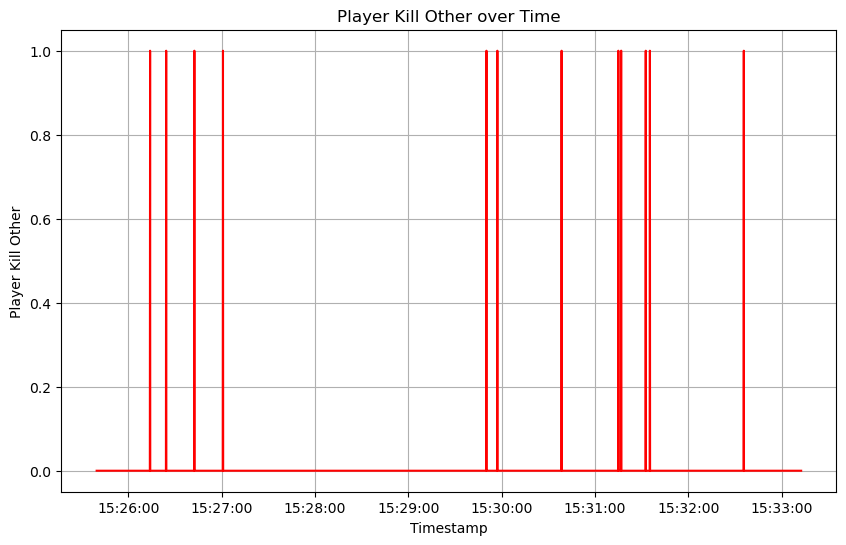

In [2]:
import json

# Step 1: Open the JSON file
with open('data.json', 'r') as json_file:
    # Step 2: Load the JSON data into a Python dictionary
    data = json.load(json_file)

# Step 3: Process and inspect the data
# print(data)


player_kill_data = [entry for entry in data.values() if entry['player_kill_other'] == 1]

print(len(player_kill_data))

player_be_killed = [entry for entry in data.values() if entry['player_get_killed'] == 1]

print(len(player_be_killed))

timestamps_with_player_kill_other = []
timestamps = []
for timestamp, entry in data.items():
    if entry.get('player_kill_other') == 1:
        timestamps_with_player_kill_other.append(timestamp)
    timestamps.append(timestamp)

print(len(timestamps_with_player_kill_other))
print(len(timestamps))


timestamps_kill_proper = pd.to_datetime(timestamps_with_player_kill_other, unit='s')
timestamps_proper = pd.to_datetime(timestamps, unit='s')

print(timestamps_kill_proper)
print(timestamps_proper)

# Create the y-values corresponding to player_kill_other
kill_values = [1 if timestamp in timestamps_kill_proper else 0 for timestamp in timestamps_proper]

# print(y_values)
# Create the plot

plt.figure(figsize=(10, 6))
plt.plot(timestamps_proper, kill_values, linestyle='-', color='red')

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Player Kill Other')
plt.title('Player Kill Other over Time')
plt.grid(True)

date_form = mdates.DateFormatter("%H:%M:%S", tz=pytz.timezone('US/Eastern'))
plt.gca().xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()

2
2
6000
DatetimeIndex(['2023-08-04 19:28:57.842843294', '2023-08-04 19:29:59.788515091'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2023-08-04 19:25:39.676266432',
               '2023-08-04 19:25:43.118897915',
               '2023-08-04 19:25:43.208710194',
               '2023-08-04 19:25:43.292010307',
               '2023-08-04 19:25:43.371627808',
               '2023-08-04 19:25:43.460424423',
               '2023-08-04 19:25:43.552444458',
               '2023-08-04 19:25:43.639768600',
               '2023-08-04 19:25:43.727376461',
               '2023-08-04 19:25:43.827990055',
               ...
               '2023-08-04 19:33:11.813546181',
               '2023-08-04 19:33:11.901617527',
               '2023-08-04 19:33:11.992062807',
               '2023-08-04 19:33:12.079569340',
               '2023-08-04 19:33:12.164353132',
               '2023-08-04 19:33:12.241606474',
               '2023-08-04 19:33:12.333537579',
               '2023-08-04 19:33:12.411

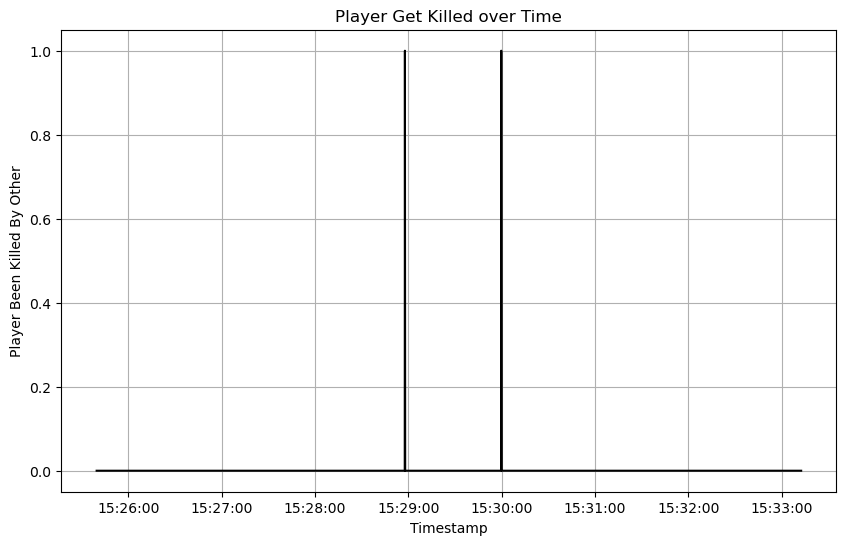

In [3]:


player_be_killed = [entry for entry in data.values() if entry['player_get_killed'] == 1]

print(len(player_be_killed))

timestamps_with_player_been_killed = []
timestamps = []
for timestamp, entry in data.items():
    if entry.get('player_get_killed') == 1:
        timestamps_with_player_been_killed .append(timestamp)
    timestamps.append(timestamp)

print(len(timestamps_with_player_been_killed))
print(len(timestamps))


timestamps_been_killed_proper = pd.to_datetime(timestamps_with_player_been_killed, unit='s')
timestamps_proper = pd.to_datetime(timestamps, unit='s')

print(timestamps_been_killed_proper)
print(timestamps_proper)

# Create the y-values corresponding to player_kill_other
killed_values = [1 if timestamp in timestamps_been_killed_proper else 0 for timestamp in timestamps_proper]

# print(y_values)
# Create the plot

plt.figure(figsize=(10, 6))
plt.plot(timestamps_proper, killed_values, linestyle='-', color='black')

# Customize the plot
# plt.xticks(rotation=45, ha='right')

plt.xlabel('Timestamp')
plt.ylabel('Player Been Killed By Other')
plt.title('Player Get Killed over Time')
plt.grid(True)

date_form = mdates.DateFormatter("%H:%M:%S", tz=pytz.timezone('US/Eastern'))
plt.gca().xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()

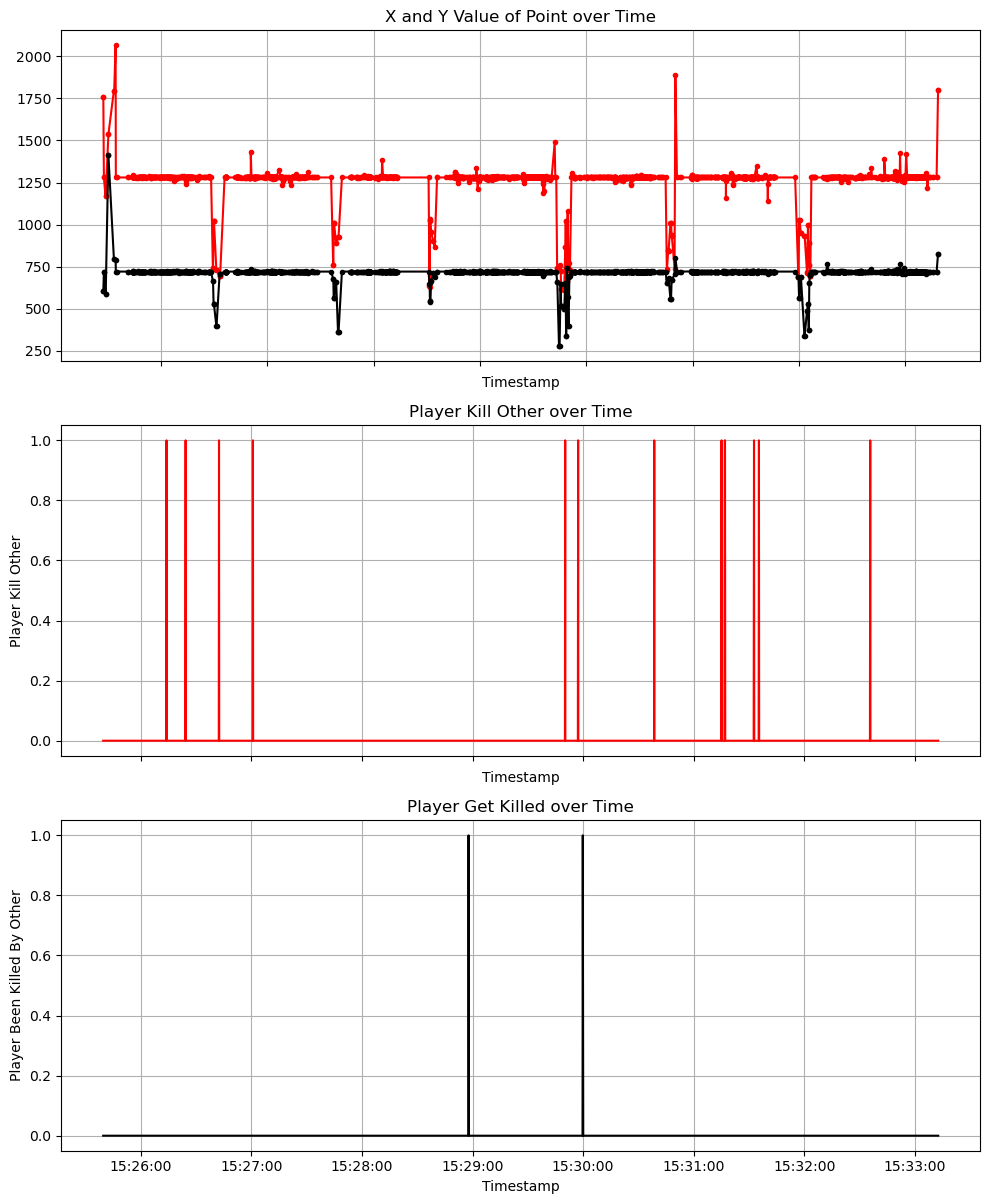

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot the first graph in the first subplot
axs[0].plot(df['Timestamp'], df['X_Value'], marker='.', linestyle='-', color='red')
axs[0].plot(df['Timestamp'], df['Y_Value'], marker='.', linestyle='-', color='black')
axs[0].set_xlabel('Timestamp')
axs[0].set_title('X and Y Value of Point over Time')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(plt.NullFormatter())

date_form = mdates.DateFormatter("%H:%M:%S", tz=pytz.timezone('US/Eastern'))
# axs[0].gca().xaxis.set_major_formatter(date_form)

# Plot the second graph in the second subplot
# Replace 'y_values' with your data for the second graph
axs[1].plot(timestamps_proper, kill_values, linestyle='-', color='red')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Player Kill Other')
axs[1].set_title('Player Kill Other over Time')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(plt.NullFormatter())

# Plot the third graph in the third subplot
# Replace 'y_values' with your data for the third graph
axs[2].plot(timestamps_proper, killed_values, linestyle='-', color='black')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('Player Been Killed By Other')
axs[2].set_title('Player Get Killed over Time')
axs[2].grid(True)
axs[2].xaxis.set_major_formatter(plt.NullFormatter())

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()

In [5]:
# Read in-game data from JSON file
with open('data.json', 'r') as f:
    data_dict = json.load(f)
    
timestamps = []
kills = []
death = []

# Process the JSON data and extract the relevant information
for timestamp, values in data_dict.items():
    temp_time = pd.to_datetime(float(timestamp), unit='s')
    timestamps.append(temp_time)  # Convert the timestamp to pandas datetime
    kills.append(values['player_kill_other'])
    death.append(values['player_get_killed'])

kill_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Kills': kills
})
death_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Death': death
})

pittsburgh_tz = pytz.timezone('US/Eastern')
kill_df['Timestamp'] = kill_df['Timestamp'].apply(lambda x: pd.Timestamp(x, unit='s', tz='UTC').tz_convert(pittsburgh_tz))
death_df['Timestamp'] = death_df['Timestamp'].apply(lambda x: pd.Timestamp(x, unit='s', tz='UTC').tz_convert(pittsburgh_tz))

kill_df_true = kill_df[kill_df['Kills'] == 1]

# Get the Timestamp values where 'Kills' is equal to 1
timestamps_with_kills = kill_df_true['Timestamp']


print(timestamps_with_kills)

time_components = timestamps_with_kills.dt.time.tolist()

# Print or use the time components as needed
print(time_components)

415    2023-08-04 15:26:14.052573696-04:00
523    2023-08-04 15:26:24.393651712-04:00
703    2023-08-04 15:26:42.508628480-04:00
878    2023-08-04 15:27:00.895182336-04:00
3047   2023-08-04 15:29:50.260519680-04:00
3123   2023-08-04 15:29:57.278795008-04:00
3917   2023-08-04 15:30:38.559807232-04:00
4370   2023-08-04 15:31:15.042571776-04:00
4387   2023-08-04 15:31:16.783781120-04:00
4388   2023-08-04 15:31:16.931439616-04:00
4522   2023-08-04 15:31:32.655348992-04:00
4542   2023-08-04 15:31:35.321413376-04:00
5595   2023-08-04 15:32:35.687921408-04:00
Name: Timestamp, dtype: datetime64[ns, US/Eastern]
[datetime.time(15, 26, 14, 52573), datetime.time(15, 26, 24, 393651), datetime.time(15, 26, 42, 508628), datetime.time(15, 27, 0, 895182), datetime.time(15, 29, 50, 260519), datetime.time(15, 29, 57, 278795), datetime.time(15, 30, 38, 559807), datetime.time(15, 31, 15, 42571), datetime.time(15, 31, 16, 783781), datetime.time(15, 31, 16, 931439), datetime.time(15, 31, 32, 655348), datetim

In [6]:
df = pd.read_csv('activity_log.csv')

# Step 2: Convert the 'Timestamp' column to a proper datetime format (if not already done)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

for index, row in df.iterrows():
    for time_obj in time_components:
        if (time_obj.hour, time_obj.minute, time_obj.second) == (row['Timestamp'].time().hour, row['Timestamp'].time().minute, row['Timestamp'].time().second - 2):
            print(row['Timestamp'], row['Input'])
        if (time_obj.hour, time_obj.minute, time_obj.second) == (row['Timestamp'].time().hour, row['Timestamp'].time().minute, row['Timestamp'].time().second - 1):
            print(row['Timestamp'], row['Input'])
        if (time_obj.hour, time_obj.minute, time_obj.second) == (row['Timestamp'].time().hour, row['Timestamp'].time().minute, row['Timestamp'].time().second):
            print(row['Timestamp'], row['Input'])
        if (time_obj.hour, time_obj.minute, time_obj.second) == (row['Timestamp'].time().hour, row['Timestamp'].time().minute, row['Timestamp'].time().second + 1):
            print(row['Timestamp'], row['Input'])
        if (time_obj.hour, time_obj.minute, time_obj.second) == (row['Timestamp'].time().hour, row['Timestamp'].time().minute, row['Timestamp'].time().second + 2):
            print(row['Timestamp'], row['Input'])

2023-04-08 15:26:12.230000 'a'
2023-04-08 15:26:12.640000 'd'
2023-04-08 15:26:12.780000 'a'
2023-04-08 15:26:13.130000 'd'
2023-04-08 15:26:13.330000 'a'
2023-04-08 15:26:13.520000 'd'
2023-04-08 15:26:13.690000 'a'
2023-04-08 15:26:13.690000 Button.left
2023-04-08 15:26:13.750000 'd'
2023-04-08 15:26:13.790000 Button.left
2023-04-08 15:26:14.300000 'd'
2023-04-08 15:26:14.330000 'd'
2023-04-08 15:26:14.370000 'd'
2023-04-08 15:26:14.400000 'd'
2023-04-08 15:26:14.430000 'd'
2023-04-08 15:26:14.460000 'd'
2023-04-08 15:26:14.490000 'd'
2023-04-08 15:26:14.520000 'd'
2023-04-08 15:26:14.630000 'a'
2023-04-08 15:26:15.130000 'a'
2023-04-08 15:26:15.160000 'a'
2023-04-08 15:26:15.210000 'a'
2023-04-08 15:26:15.240000 'a'
2023-04-08 15:26:15.270000 'a'
2023-04-08 15:26:15.300000 'a'
2023-04-08 15:26:15.330000 'a'
2023-04-08 15:26:15.370000 'a'
2023-04-08 15:26:15.400000 'a'
2023-04-08 15:26:15.430000 'a'
2023-04-08 15:26:15.480000 'a'
2023-04-08 15:26:15.480000 'w'
2023-04-08 15:26:15.520

In [7]:
# Read in-game data from JSON file
with open('data.json', 'r') as f:
    data_dict = json.load(f)

timestamps = []
kills = []
death = []

# Process the JSON data and extract the relevant information
for timestamp, values in data_dict.items():
    temp_time = pd.to_datetime(float(timestamp), unit='s')
    timestamps.append(temp_time)  # Convert the timestamp to pandas datetime
    kills.append(values['player_kill_other'])
    death.append(values['player_get_killed'])

kill_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Kills': kills
})


utc_tz = pytz.utc
edt_tz = pytz.timezone('US/Eastern')

kill_df['Timestamp'] = kill_df['Timestamp'].apply(lambda x: pd.Timestamp(x, unit='s', tz='UTC').tz_convert(pittsburgh_tz))

kill_timestamps = []
for index, row in kill_df.iterrows():
    if row['Kills'] == 1:
        # Convert UTC to EDT
        edt_timestamp = row['Timestamp'].replace(tzinfo=utc_tz).astimezone(edt_tz)

        # Convert EDT timestamp to seconds
        edt_timestamp_seconds = edt_timestamp.timestamp()
        
        kill_timestamps.append(edt_timestamp_seconds)
        
print(kill_timestamps)

[1691162774.052574, 1691162784.393652, 1691162802.508628, 1691162820.895182, 1691162990.26052, 1691162997.278795, 1691163038.559807, 1691163075.042572, 1691163076.783781, 1691163076.93144, 1691163092.655349, 1691163095.321413, 1691163155.687922]


In [8]:
def update_row_data(row, row_timestamp, row_a, row_w, row_s, row_d, row_left, row_right):
    if row['Input'] == "'a'":
        row_timestamp.append(row['Timestamp'].timestamp())
        row_a.append(1)
        row_w.append(0)
        row_s.append(0)
        row_d.append(0)
        row_left.append(0)
        row_right.append(0)
    elif row['Input'] == "'w'":
        row_timestamp.append(row['Timestamp'].timestamp())
        row_a.append(0)
        row_w.append(1)
        row_s.append(0)
        row_d.append(0)
        row_left.append(0)
        row_right.append(0)
    elif row['Input'] == "'s'":
        row_timestamp.append(row['Timestamp'].timestamp())
        row_a.append(0)
        row_w.append(0)
        row_s.append(1)
        row_d.append(0)
        row_left.append(0)
        row_right.append(0)
    elif row['Input'] == "'d'":
        row_timestamp.append(row['Timestamp'].timestamp())
        row_a.append(0)
        row_w.append(0)
        row_s.append(0)
        row_d.append(1)
        row_left.append(0)
        row_right.append(0)
    elif row['Input'] == "Button.left":
        row_timestamp.append(row['Timestamp'].timestamp())
        row_a.append(0)
        row_w.append(0)
        row_s.append(0)
        row_d.append(0)
        row_left.append(1)
        row_right.append(0)
    elif row['Input'] == "Button.right":
        row_timestamp.append(row['Timestamp'].timestamp())
        row_a.append(0)
        row_w.append(0)
        row_s.append(0)
        row_d.append(0)
        row_left.append(0)
        row_right.append(1)

def plot_logger(axs, count, row_timestamp, row_a, row_w, row_s, row_d, row_left, row_right):
    non_zero_indices = [i for i, value in enumerate(row_a) if value != 0]
    row_timestamp_a = [row_timestamp[i] - row_timestamp[non_zero_indices[0]] + 1 for i in non_zero_indices]
    row_a = [row_a[i] for i in non_zero_indices]
    axs[count].scatter(row_timestamp_a, row_a, label="'a'")
    
    non_zero_indices = [i for i, value in enumerate(row_w) if value != 0]
    row_timestamp_w = [row_timestamp[i] - row_timestamp[non_zero_indices[0]] + 1 for i in non_zero_indices]
    row_w = [row_w[i] for i in non_zero_indices]
    axs[count].scatter(row_timestamp_w, row_w, label="'w'")
    
    non_zero_indices = [i for i, value in enumerate(row_d) if value != 0]
    row_timestamp_d = [row_timestamp[i] - row_timestamp[non_zero_indices[0]] + 1 for i in non_zero_indices]
    row_d = [row_d[i] for i in non_zero_indices]
    axs[count].scatter(row_timestamp_d, row_d, label="'d'")
    
    non_zero_indices = [i for i, value in enumerate(row_s) if value != 0]
    row_timestamp_s = [row_timestamp[i] - row_timestamp[non_zero_indices[0]] + 1 for i in non_zero_indices]
    row_s = [row_s[i] for i in non_zero_indices]
    axs[count].scatter(row_timestamp_s, row_s, label="'s'")
    
    non_zero_indices = [i for i, value in enumerate(row_left) if value != 0]
    row_timestamp_left = [row_timestamp[i] - row_timestamp[non_zero_indices[0]] + 1 for i in non_zero_indices]
    row_left = [row_left[i] for i in non_zero_indices]
    axs[count].scatter(row_timestamp_left, row_left, label="'left'")
    
    non_zero_indices = [i for i, value in enumerate(row_right) if value != 0]
    row_timestamp_right = [row_timestamp[i] - row_timestamp[non_zero_indices[0]] + 1 for i in non_zero_indices]
    row_right= [row_right[i] for i in non_zero_indices]
    axs[count].scatter(row_timestamp_right, row_right, label="'right'")

16
0
25
18
4
0
0
3
12
17
40
2
18


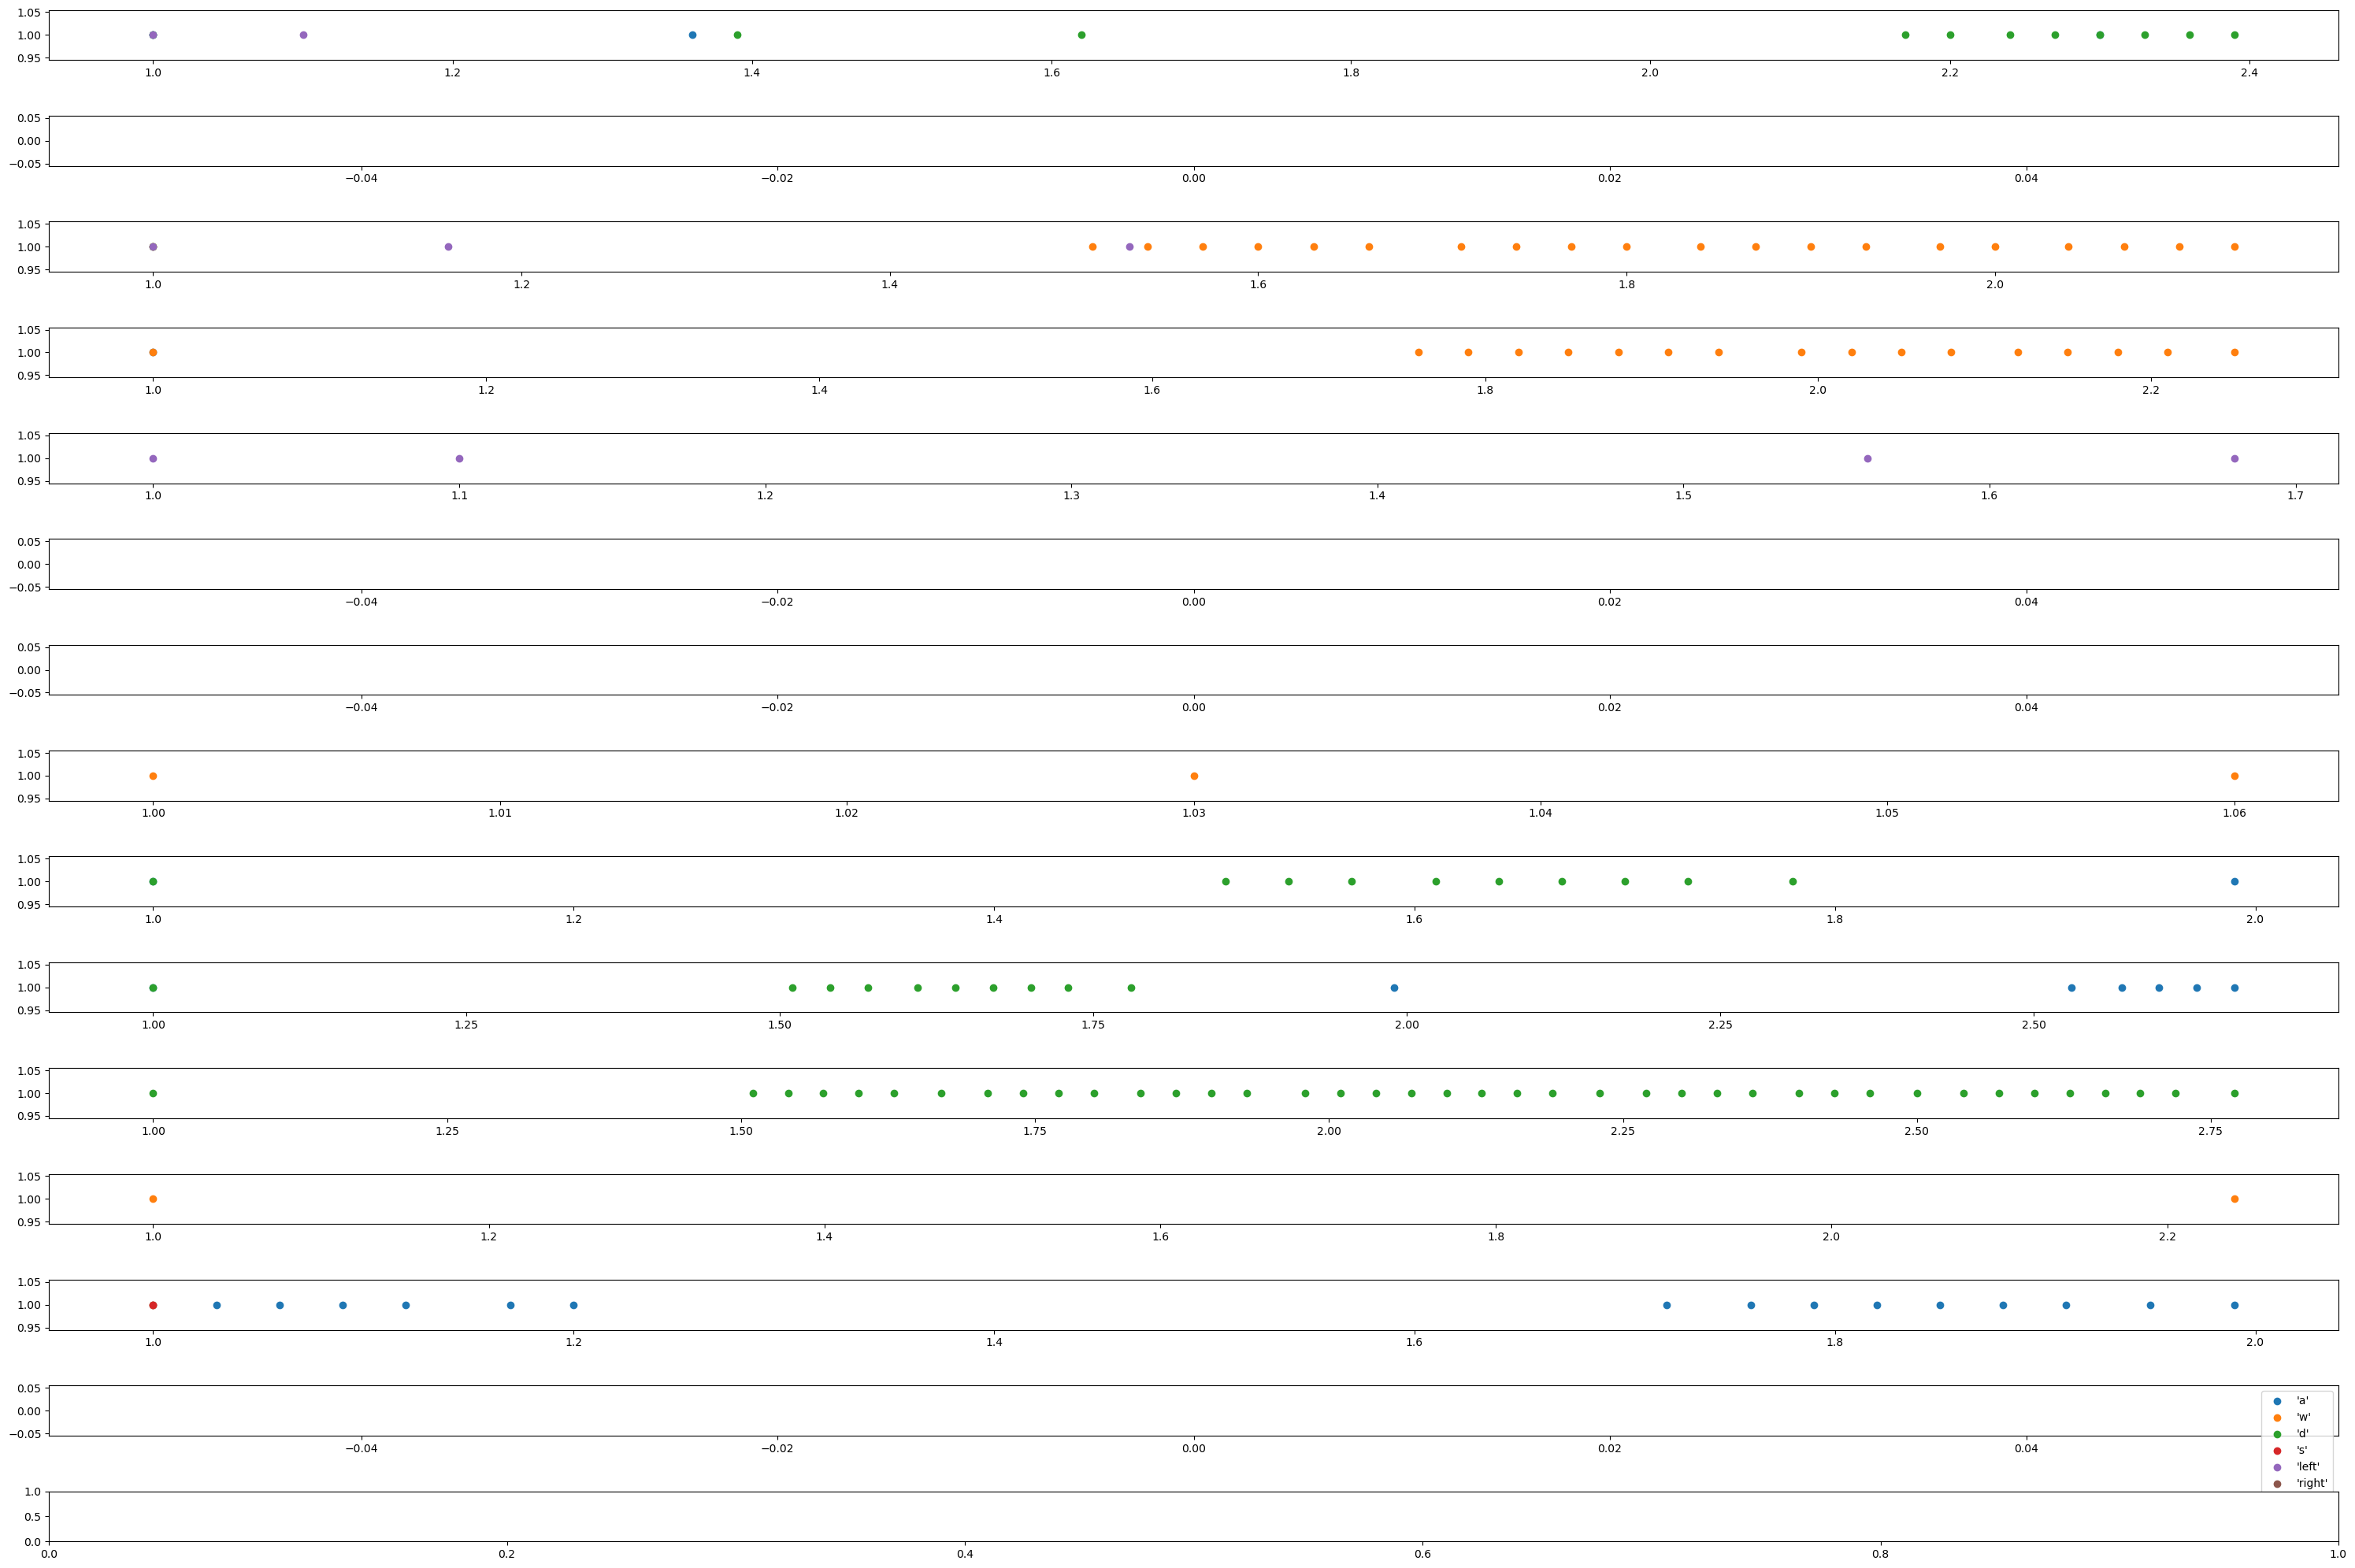

In [9]:
df = pd.read_csv('activity_log.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y, %H:%M:%S.%f")

# Convert datetime to seconds with milliseconds

tolerance = 1

previous_time = 0
row_timestamp = []

row_a = []
row_w = []
row_s = []
row_d = []
row_left = [] 
row_right = []

count = 0

fig = plt.figure(figsize=(30, 20))
gs = fig.add_gridspec(15, 1)  # 6 rows, 2 columns
axs = gs.subplots()
axs = axs.flatten()

for time in kill_timestamps:
    for index, row in df.iterrows():
        if abs(time - row['Timestamp'].timestamp()) <= tolerance:               
            update_row_data(row, row_timestamp, row_a, row_w, row_s, row_d, row_left, row_right)
            
    print(len(row_timestamp))
    row_timestamp = [(x - row_timestamp[0] + 1)for x in row_timestamp]
    
    plot_logger(axs, count, row_timestamp, row_a, row_w, row_s, row_d, row_left, row_right)

    # axs[count].xaxis.set_major_formatter(plt.NullFormatter())

    row_timestamp = []
    row_a = []
    row_w = []
    row_s = []
    row_d = []
    row_left = [] 
    row_right = []

    count += 1               

row_timestamp = [(x - row_timestamp[0] + 1) for x in row_timestamp]

plot_logger(axs, count, row_timestamp, row_a, row_w, row_s, row_d, row_left, row_right)
axs[count].legend()
plt.tight_layout()

# Show the entire figure with subplots
plt.show()





